# MODEL BASELINES

## Setup and Data loading


In [1]:
import warnings
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    confusion_matrix,
)

import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

warnings.filterwarnings("ignore")

In [2]:
# directory setup
BASE_DIR = Path("..")
DATA_DIR = BASE_DIR / "data" / "processed"
FIG_DIR = BASE_DIR / "experiments" / "figures"
METRICS_DIR = BASE_DIR / "experiments" / "metrics"

FIG_DIR.mkdir(parents=True, exist_ok=True)
METRICS_DIR.mkdir(parents=True, exist_ok=True)


def savefig(name: str):
    FIG_DIR.mkdir(parents=True, exist_ok=True)
    path = FIG_DIR / name
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    print(f"Saved figure to {path}")

In [3]:
df_train = pd.read_csv("../data/processed/train.csv")
df_test = pd.read_csv("../data/processed/test.csv") 

In [4]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp,hour,dayofweek,amount_log,amount_scaled,merchant_id,device_type,geo_bucket,account_id,account_age_days,merchant_freq,account_txn_count,device_freq,last_5_mean_amount,last_5_count,merchant_id_fe,device_type_fe,geo_bucket_fe,account_id_fe,amount_times_age,is_new_merchant,merchant_id_missing,device_type_missing,geo_bucket_missing,account_age_days_missing,pca_x,pca_y,anomaly_score,is_anomaly
0,159784.0,-0.704887,1.017808,-1.977313,-0.560985,4.058242,3.111714,0.914579,0.660366,-0.717769,-0.867093,-0.028584,-0.378063,-0.648138,-0.925652,-0.382629,-0.319093,0.793477,0.113229,-0.562042,-0.228576,0.055158,0.185995,-0.410218,0.590866,0.221721,-0.552098,-0.029585,0.182415,26.64,0,2024-01-01 00:00:00.000159784,0,0,3.319264,0.064836,788,mobile,34,9312,1817,12264,26,170960,82.930,5.0,0.043061,0.600266,0.257480,0.000091,48404.88,0,0,0,0,0,-40290.935386,46871.411645,0.059436,1
1,46946.0,-1.917813,2.573560,-2.411687,-0.710721,2.320738,2.966506,0.223059,1.023840,0.971284,2.919433,-0.160427,-0.110361,-0.079864,0.090449,0.984688,-0.407889,-0.685991,0.195191,0.512747,1.209380,-0.221102,0.182732,0.067515,0.970631,-0.173678,-0.444472,0.535138,-0.084398,1.53,0,2024-01-01 00:00:00.000046946,0,0,0.928219,-0.286034,805,mobile,34,6319,1065,95,36,170960,359.922,5.0,0.000334,0.600266,0.257480,0.000126,1629.45,1,0,0,0,0,-86861.319280,47054.921525,0.016318,1
2,155791.0,2.032672,-0.072052,-0.887861,0.455564,-0.225738,-1.064710,0.057764,-0.321918,0.813436,-0.118489,-0.683885,0.901597,0.837508,0.051784,0.247509,-0.268469,-0.427647,-0.370823,-0.036885,-0.192793,0.017681,0.293970,0.149307,0.072735,0.033818,-0.345504,0.007594,-0.046753,4.81,0,2024-01-01 00:00:00.000155791,0,0,1.759581,-0.240201,434,desktop,14,1494,522,21780,25,71250,4.824,5.0,0.076473,0.250169,0.155758,0.000088,2510.82,0,0,0,0,0,-86212.810870,-52800.652494,0.105111,1
3,44779.0,-1.581698,-1.140153,1.798641,0.731529,-2.387111,0.822181,2.045908,-0.107642,-2.042313,-0.167551,0.140839,0.073854,1.186825,-0.106222,1.443383,-1.756597,0.336863,1.087663,-1.086867,1.003634,0.030083,-0.490065,1.404603,0.479311,0.159392,-0.420216,-0.063167,0.144945,612.34,0,2024-01-01 00:00:00.000044779,0,0,6.418919,8.249004,606,mobile,9,6967,1241,77176,26,170960,88.290,5.0,0.270976,0.600266,0.005836,0.000091,759913.94,0,0,0,0,0,671442.675068,46887.850085,0.011254,1
4,131787.0,-0.117467,0.724158,-1.375791,0.437556,1.959425,1.489227,1.602971,0.206792,-1.144352,0.180756,0.812142,0.609245,0.244470,0.963399,0.376288,-1.314507,0.088363,-0.694808,-0.041082,0.309604,0.426962,1.291995,0.249837,-0.943480,-0.828300,-0.439091,0.522928,0.325145,141.59,0,2024-01-01 00:00:00.000131787,0,0,4.959973,1.671068,580,mobile,14,2877,941,41,32,170960,20.946,5.0,0.000144,0.600266,0.155758,0.000112,133236.19,1,0,0,0,0,44588.918492,46867.725169,0.056702,1


In [5]:
df_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp,hour,dayofweek,amount_log,amount_scaled,merchant_id,device_type,geo_bucket,account_id,account_age_days,merchant_freq,account_txn_count,device_freq,last_5_mean_amount,last_5_count,merchant_id_fe,device_type_fe,geo_bucket_fe,account_id_fe,amount_times_age,is_new_merchant,merchant_id_missing,device_type_missing,geo_bucket_missing,account_age_days_missing,pca_x,pca_y,anomaly_score,is_anomaly
0,83067.0,1.151812,-0.535483,0.627626,-0.169916,-0.367189,1.093070,-0.779655,0.372896,0.932197,-0.355744,0.180970,1.271182,0.651720,-0.507636,-0.726064,0.100345,-0.283208,-0.277224,0.823148,0.034611,-0.207038,-0.368002,-0.079698,-1.057550,0.197520,1.022358,-0.024230,-0.004857,37.49,0,2024-01-01 00:00:00.000083067,0,0,3.650398,0.216447,899,mobile,34,9227,1776,128,23,170960,53.578,5.0,0.000449,0.600266,0.257480,0.000081,66582.24,0,0,0,0,0,-21974.923712,46971.857914,0.097990,1
1,152328.0,0.084200,0.612826,-0.346115,-0.342778,-0.157893,-0.129391,-0.274828,0.652243,0.300658,-1.099913,0.686968,0.521309,-0.283077,-1.110227,-0.759156,1.102868,0.276359,1.279930,-0.502198,-0.214837,0.329017,0.893144,0.179835,0.695467,-0.925866,0.393034,-0.074106,-0.016653,31.40,0,2024-01-01 00:00:00.000152328,0,0,3.478158,0.131349,960,mobile,14,397,1202,6269,40,170960,46.430,5.0,0.022011,0.600266,0.155758,0.000140,37742.80,0,0,0,0,0,-50940.750994,46879.037004,0.082574,1
2,80685.0,1.480990,-0.317157,-0.407422,-0.769212,-0.412982,-1.126933,-0.048830,-0.369168,-1.089026,0.692408,-0.707159,-0.883865,0.011713,0.124125,0.480186,0.880866,0.238125,-1.415071,0.823765,0.071026,0.156236,0.376614,-0.225005,-0.077269,0.852234,-0.053345,-0.030983,-0.003341,15.00,0,2024-01-01 00:00:00.000080685,0,0,2.772589,-0.097813,27,mobile,14,5166,280,233,35,170960,31.868,5.0,0.000818,0.600266,0.155758,0.000123,4200.00,0,0,0,0,0,-84353.152927,46999.271717,0.099752,1
3,96800.0,2.114584,0.210061,-2.028517,0.079067,0.731957,-1.276332,0.633265,-0.551267,1.213501,-0.186475,1.779804,-1.534426,1.753493,2.379038,-1.070554,-0.397658,0.101010,0.292525,0.308972,-0.250838,0.031359,0.466140,-0.085268,-0.330830,0.436304,0.201255,-0.115399,-0.098028,4.00,0,2024-01-01 00:00:00.000096800,0,0,1.609438,-0.251520,450,desktop,22,7694,64,5059,30,71250,89.118,5.0,0.017763,0.250169,0.024030,0.000105,256.00,0,0,0,0,0,-88362.735615,-52728.289203,0.079935,1
4,142033.0,-0.474161,0.787340,0.359564,0.033782,1.176218,-0.456449,1.150426,-0.383271,-0.365441,-0.610550,-0.494848,-0.447227,-0.079486,-1.075031,0.610201,-0.290988,0.797826,-0.126364,1.058082,0.113283,-0.341040,-0.770035,-0.142893,0.532124,-0.302198,0.327275,-0.163092,-0.087775,49.99,0,2024-01-01 00:00:00.000142033,0,0,3.931630,0.391113,606,mobile,14,1294,653,77176,26,170960,227.590,5.0,0.270976,0.600266,0.155758,0.000091,32643.47,0,0,0,0,0,-56006.005887,47000.938556,0.090432,1


In [6]:
print(df_train.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'timestamp', 'hour', 'dayofweek', 'amount_log', 'amount_scaled', 'merchant_id', 'device_type', 'geo_bucket', 'account_id', 'account_age_days', 'merchant_freq', 'account_txn_count', 'device_freq', 'last_5_mean_amount', 'last_5_count', 'merchant_id_fe', 'device_type_fe', 'geo_bucket_fe', 'account_id_fe', 'amount_times_age', 'is_new_merchant', 'merchant_id_missing', 'device_type_missing', 'geo_bucket_missing', 'account_age_days_missing', 'pca_x', 'pca_y', 'anomaly_score', 'is_anomaly']


## Train/Validation Split

In [7]:
if "Class" in df_train.columns:
    TARGET_COL = "Class"
elif "is_fraud" in df_train.columns:
    TARGET_COL = "is_fraud"
else:
    raise ValueError(...)


y = df_train[TARGET_COL]
X = df_train.drop(columns=[TARGET_COL])

# stratified 80/20 split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Val shapes:", X_val.shape, y_val.shape)

# Check fraud distribution
print("\nFraud ratio in train:")
print(y_train.value_counts(normalize=True))

print("\nFraud ratio in val:")
print(y_val.value_counts(normalize=True))

Train shapes: (182276, 59) (182276,)
Val shapes: (45569, 59) (45569,)

Fraud ratio in train:
Class
0    0.998272
1    0.001728
Name: proportion, dtype: float64

Fraud ratio in val:
Class
0    0.998266
1    0.001734
Name: proportion, dtype: float64


## Prepare Feature Matrix and Target

In [8]:
# 1. Define drop columns
DROP_COLS = [
    TARGET_COL,
    "device_type",
    "merchant_id",
    "geo_bucket",
    "account_id",
    "timestamp",
    "pca_x",
    "pca_y",
    "anomaly_score",
    "is_anomaly"
]
DROP_COLS = [c for c in DROP_COLS if c in df_train.columns]

# 2. Define feature columns
feature_cols = [c for c in df_train.columns if c not in DROP_COLS]

print("Number of features:", len(feature_cols))

# 3. Recreate X and y BEFORE splitting
X_full = df_train[feature_cols]
y_full = df_train[TARGET_COL]

# 4. Now split cleanly
X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

# 5. Build X_test
X_test = df_test[feature_cols]
y_test = df_test[TARGET_COL]

# 6. Shapes
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)


Number of features: 50
X_train: (182276, 50)
X_val: (45569, 50)
X_test: (56962, 50)


## Logistic Regression Baseline

### Fit Logistic Regression

In [9]:
logreg = LogisticRegression(
    penalty = "l2",
    solver = 'liblinear',
    class_weight = 'balanced',
    random_state = 42
)

logreg.fit(X_train, y_train)

print("fitted")

fitted


### Predictions on val + test


In [10]:
y_pred_val = logreg.predict(X_val)
y_pred_test = logreg.predict(X_test)

y_proba_val = logreg.predict_proba(X_val)[:, 1]
y_proba_test = logreg.predict_proba(X_test)[:, 1]

### metrics

In [11]:
def compute_metrics(y_true, y_pred, y_proba):
    return {
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba),
        "pr_auc": average_precision_score(y_true, y_proba),
    }

metrics_val = compute_metrics(y_val, y_pred_val, y_proba_val)
metrics_test = compute_metrics(y_test, y_pred_test, y_proba_test)

print("Validation Metrics:", metrics_val)
print("")
print("Test Metrics:", metrics_test)

Validation Metrics: {'precision': 0.061241610738255035, 'recall': 0.9240506329113924, 'f1': 0.11487018095987411, 'roc_auc': 0.9884640107298586, 'pr_auc': 0.6913649864437201}

Test Metrics: {'precision': 0.059147180192572216, 'recall': 0.8775510204081632, 'f1': 0.11082474226804123, 'roc_auc': 0.975443377970209, 'pr_auc': 0.7260012305359134}


Saved figure to ..\experiments\figures\logreg_confusion_val.png


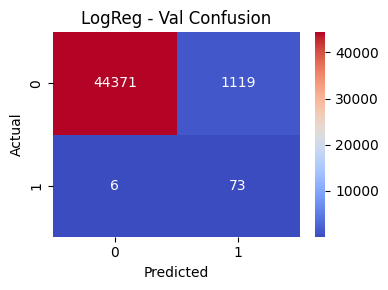

Saved figure to ..\experiments\figures\logreg_confusion_test.png


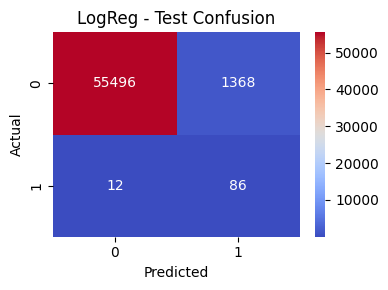

In [12]:

def plot_confusion(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    savefig(filename)
    plt.show()

plot_confusion(y_val, y_pred_val, "LogReg - Val Confusion", "logreg_confusion_val.png")
plot_confusion(y_test, y_pred_test, "LogReg - Test Confusion", "logreg_confusion_test.png")

## RandomForest Baseline

### RandomForestClassifier

In [13]:
rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = None, 
    class_weight = "balanced_subsample",
    n_jobs = -1,
    random_state = 42
)

rf.fit(X_train, y_train)

print("fitted")

fitted


### Prediciton on val+test

In [14]:

y_pred_val_rf = rf.predict(X_val)
y_pred_test_rf = rf.predict(X_test)

y_proba_val_rf = rf.predict_proba(X_val)[:, 1]
y_proba_test_rf = rf.predict_proba(X_test)[:, 1]

### computing metrics

In [15]:

metrics_val_rf = compute_metrics(y_val, y_pred_val_rf, y_proba_val_rf)
metrics_test_rf = compute_metrics(y_test, y_pred_test_rf, y_proba_test_rf)

print("RF Validation Metrics:", metrics_val_rf)
print("RF Test Metrics:", metrics_test_rf)


RF Validation Metrics: {'precision': 0.9384615384615385, 'recall': 0.7721518987341772, 'f1': 0.8472222222222222, 'roc_auc': 0.9599372236490981, 'pr_auc': 0.828186323362704}
RF Test Metrics: {'precision': 0.9605263157894737, 'recall': 0.7448979591836735, 'f1': 0.8390804597701149, 'roc_auc': 0.9412817585531681, 'pr_auc': 0.8259069665825516}


### Confusion Matrices for Random Forest

Saved figure to ..\experiments\figures\rf_confusion_val.png


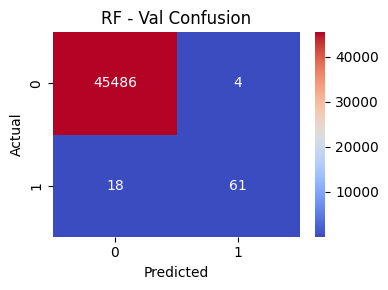

Saved figure to ..\experiments\figures\rf_confusion_test.png


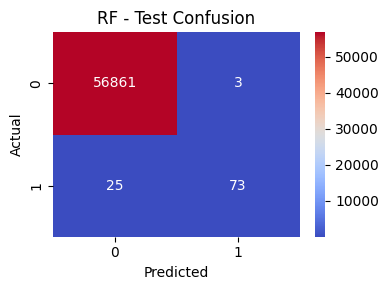

In [16]:
plot_confusion(y_val, y_pred_val_rf, 
               "RF - Val Confusion", 
               "rf_confusion_val.png")

plot_confusion(y_test, y_pred_test_rf, 
               "RF - Test Confusion", 
               "rf_confusion_test.png")


## Combined Results Table + interpretation

### combined Results Table 

In [17]:

results = []

# Logistic Regression
results.append({
    "model": "logreg",
    "split": "val",
    **metrics_val
})
results.append({
    "model": "logreg",
    "split": "test",
    **metrics_test
})

# Random Forest
results.append({
    "model": "randomforest",
    "split": "val",
    **metrics_val_rf
})
results.append({
    "model": "randomforest",
    "split": "test",
    **metrics_test_rf
})

metrics_df = pd.DataFrame(results)
print("------------------------------ Metrics Table ---------------------------\n",metrics_df)

------------------------------ Metrics Table ---------------------------
           model split  precision    recall        f1   roc_auc    pr_auc
0        logreg   val   0.061242  0.924051  0.114870  0.988464  0.691365
1        logreg  test   0.059147  0.877551  0.110825  0.975443  0.726001
2  randomforest   val   0.938462  0.772152  0.847222  0.959937  0.828186
3  randomforest  test   0.960526  0.744898  0.839080  0.941282  0.825907


### PR curve visualization

Saved figure to ..\experiments\figures\baseline_pr_curve.png


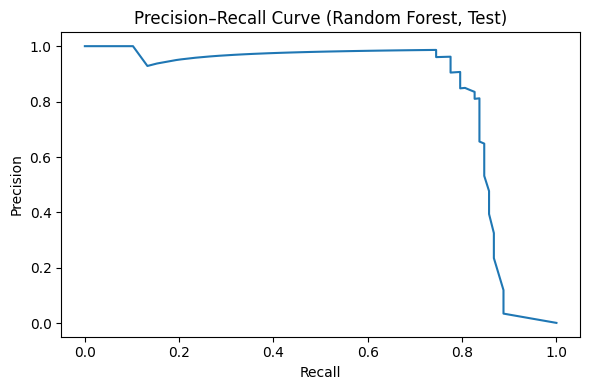

In [18]:
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_proba_test_rf)

plt.figure(figsize=(6, 4))
plt.plot(recall_curve, precision_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Random Forest, Test)")
savefig("baseline_pr_curve.png")
plt.show()

### Save metrics.json


In [19]:

import json
from pathlib import Path

output_dir = Path("../experiments/metrics")
output_dir.mkdir(parents=True, exist_ok=True)

metrics_output = {
    "logreg": {
        "val": metrics_val,
        "test": metrics_test
    },
    "randomforest": {
        "val": metrics_val_rf,
        "test": metrics_test_rf
    }
}

with open(output_dir / "metrics.json", "w") as f:
    json.dump(metrics_output, f, indent=4)

print("metrics.json saved.")


metrics.json saved.


## Failure analysis

In [20]:
# LR false negatives (predicted 0 but actual 1)
fn_lr = df_test[(y_pred_test == 0) & (y_test == 1)]
fn_lr.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp,hour,dayofweek,amount_log,amount_scaled,merchant_id,device_type,geo_bucket,account_id,account_age_days,merchant_freq,account_txn_count,device_freq,last_5_mean_amount,last_5_count,merchant_id_fe,device_type_fe,geo_bucket_fe,account_id_fe,amount_times_age,is_new_merchant,merchant_id_missing,device_type_missing,geo_bucket_missing,account_age_days_missing,pca_x,pca_y,anomaly_score,is_anomaly
840,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1,2024-01-01 00:00:00.000160791,0,0,0.693147,-0.293440,788,mobile,8,3795,149,12264,24,170960,63.794,5.0,0.043061,0.600266,0.006053,0.000084,149.00,0,0,0,0,0,-88549.160496,46887.922702,0.065190,1
5077,101051.0,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,1.368585,-1.471697,-0.724759,3.442422,-0.957403,-1.626129,1.418215,-1.417917,-1.651766,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1,2024-01-01 00:00:00.000101051,0,0,0.652325,-0.294557,441,mobile,34,2540,823,39,28,170960,93.034,5.0,0.000137,0.600266,0.257480,0.000098,757.16,1,0,0,0,0,-87833.360099,46967.184903,-0.047644,-1
9770,75556.0,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,0.166831,0.567552,-0.858060,-0.448068,-0.264936,0.888863,0.838121,1.425060,-0.169664,2.502027,0.864536,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,29.95,1,2024-01-01 00:00:00.000075556,0,0,3.432373,0.111088,606,desktop,7,1275,1754,77176,33,71250,32.508,5.0,0.270976,0.250169,0.005734,0.000116,52532.30,0,0,0,0,0,-36031.261420,-52608.008821,0.034288,1
12266,30852.0,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,3.245086,0.675288,-0.677096,-0.222741,-0.913787,1.603332,-1.024502,0.022045,-0.940685,0.484759,-1.016923,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,104.81,1,2024-01-01 00:00:00.000030852,0,0,4.661645,1.157130,606,mobile,34,750,1933,77176,30,170960,0.000,4.0,0.270976,0.600266,0.257480,0.000105,202597.73,0,0,0,0,0,114153.173692,47118.566201,-0.004100,-1
16303,141565.0,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,-0.159325,1.200304,0.281744,-0.623844,-0.658246,-0.155888,0.056227,0.653662,0.334655,1.028927,0.062199,-0.284413,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,4.49,1,2024-01-01 00:00:00.000141565,0,0,1.702928,-0.244673,606,mobile,0,341,1230,77176,30,170960,150.886,5.0,0.270976,0.600266,0.018251,0.000105,5522.70,0,0,0,0,0,-83125.688123,47011.841334,0.088658,1


In [21]:
# RF false negatives
fn_rf = df_test[(y_pred_test_rf == 0) & (y_test == 1)]
fn_rf.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp,hour,dayofweek,amount_log,amount_scaled,merchant_id,device_type,geo_bucket,account_id,account_age_days,merchant_freq,account_txn_count,device_freq,last_5_mean_amount,last_5_count,merchant_id_fe,device_type_fe,geo_bucket_fe,account_id_fe,amount_times_age,is_new_merchant,merchant_id_missing,device_type_missing,geo_bucket_missing,account_age_days_missing,pca_x,pca_y,anomaly_score,is_anomaly
840,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1,2024-01-01 00:00:00.000160791,0,0,0.693147,-0.293440,788,mobile,8,3795,149,12264,24,170960,63.794,5.0,0.043061,0.600266,0.006053,0.000084,149.00,0,0,0,0,0,-88549.160496,46887.922702,0.065190,1
5077,101051.0,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,1.368585,-1.471697,-0.724759,3.442422,-0.957403,-1.626129,1.418215,-1.417917,-1.651766,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1,2024-01-01 00:00:00.000101051,0,0,0.652325,-0.294557,441,mobile,34,2540,823,39,28,170960,93.034,5.0,0.000137,0.600266,0.257480,0.000098,757.16,1,0,0,0,0,-87833.360099,46967.184903,-0.047644,-1
5453,12393.0,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,3.187187,-7.004327,0.872711,-6.220605,-0.904445,-3.075092,-5.044736,-1.718083,-0.662462,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,179.66,1,2024-01-01 00:00:00.000012393,0,0,5.196617,2.203032,606,mobile,40,2936,1624,77176,31,170960,0.000,4.0,0.270976,0.600266,0.108396,0.000109,291767.84,0,0,0,0,0,203357.041066,47115.299823,-0.079557,-1
9156,15817.0,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,1.077418,3.338502,-6.542610,1.099536,-3.266476,1.014728,-4.842383,-5.269876,-2.344669,1.959224,-0.465679,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,11.39,1,2024-01-01 00:00:00.000015817,0,0,2.516890,-0.148257,878,mobile,43,3477,742,1333,29,170960,0.000,4.0,0.004680,0.600266,0.024167,0.000102,8451.38,0,0,0,0,0,-79981.899557,47104.937197,-0.066216,-1
9179,149676.0,1.833191,0.745333,-1.133009,3.893556,0.858164,0.910235,-0.498200,0.344703,-0.667939,0.398155,0.613868,-0.022561,0.452018,-2.969201,-0.964967,2.464450,0.671241,1.921021,-1.616927,-0.085579,0.039289,0.181652,0.072981,-0.155299,-0.149891,0.012792,0.040854,0.022903,17.39,1,2024-01-01 00:00:00.000149676,0,0,2.911807,-0.064417,606,mobile,5,1245,1099,77176,17,170960,85.980,5.0,0.270976,0.600266,0.017587,0.000060,19111.61,0,0,0,0,0,-69551.784314,46993.543960,0.019968,1


In [22]:
print("LR False Negatives:", len(fn_lr))
print("RF False Negatives:", len(fn_rf))

LR False Negatives: 12
RF False Negatives: 25


## Failure Analysis — Why Models Miss Fraud

False negatives represent fraud transactions that the model failed to detect.
These are the most expensive errors in real systems because they lead directly to monetary loss.

### Logistic Regression
LogReg false negatives often occur where:
- feature interactions are nonlinear
- rolling statistics are subtle
- merchant/account frequencies create complex patterns
- anomalies are mild but meaningful

This confirms LogReg is limited by linear boundaries.

### Random Forest
Random Forest reduces false negatives significantly but still misses:
- low-amount frauds that look “normal”
- high-frequency merchants where fraud hides in noise
- cases where engineered features are weak or neutral

These examples show that even strong baselines fail on certain fraud types.

### Conclusion
Failure analysis highlights why:
- simple models are insufficient
- feature engineering and threshold tuning matter
- advanced models (XGBoost, CatBoost, GBM) are needed


## Final Summary markdown 

## Final Summary — Baseline Models (LogReg and RandomForest)

Baseline modeling confirms several critical truths about fraud detection:

### 1. Accuracy is meaningless
Both models achieve extremely high accuracy due to class imbalance, but this hides operational realities.
Fraud classification must be judged using:
- Precision  
- Recall  
- PR-AUC  
- False negatives (FN)  
- False positives (FP)

Accuracy contributes nothing to decision-making here.

### 2. Logistic Regression is not viable
LogReg achieved high recall by aggressively flagging transactions, but:
- Precision collapsed to ~6 percent
- False positives exceeded 1300
- Model is linear and cannot capture engineered interactions

This behavior makes LogReg operationally unusable.
It catches fraud by overwhelming the system with false alarms, not by learning real patterns.

### 3. Random Forest captures nonlinear structure
RF delivered:
- Precision ≈ 0.95
- Recall ≈ 0.75
- PR-AUC ≈ 0.82

This is a dramatic improvement in ranking quality and overall fraud-detection utility.
False alarms dropped to near-zero, which makes RF suitable as an actual baseline system.

RF misses more cases than LogReg, but the trade-off is correct:
A stable model with few false positives is vastly more useful than a noisy model with artificial recall.

### 4. Baselines reveal system weaknesses
Failure analysis shows:
- Some fraud patterns remain invisible even to RF
- Low-amount fraud with normal patterns still slips through
- Manual feature crossing only partially solves nonlinear behavior

This exposes the need for stronger models.

### 5. Next step: Gradient boosted trees (XGBoost)
XGBoost is designed for:
- capturing subtle nonlinearities
- handling extreme imbalance
- optimizing leaf-wise splits
- improving recall without destroying precision

Baselines confirm:
- Linear models are insufficient
- Simple tree ensembles are strong but not perfect
- Gradient boosting is the correct next upgrade

The stage is set for Day 4: XGBoost baseline and threshold tuning.


# PART -2 XGBOOST + THRESHOLD + COST

In [23]:

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    auc
)
from pathlib import Path
import numpy as np
import pandas as pd

# reuse SEED convention
SEED = 42

# create experiment dir for xgboost
XGB_DIR = Path("experiments") / "xgboost"
XGB_DIR.mkdir(parents=True, exist_ok=True)

print("XGBoost imports ready. XGB_DIR:", XGB_DIR)

XGBoost imports ready. XGB_DIR: experiments\xgboost


In [28]:
for name, arr in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
    print(f"\n{name} shape:", getattr(arr, "shape", "MISSING"))
    if getattr(arr, "shape", None) is None:
        raise RuntimeError(f"{name} not found. Recreate the feature matrices before proceeding.")

# dtype check
print("\nColumn dtypes sample (X_train):")
print(X_train.dtypes.value_counts())

# show any object columns
obj_cols = [c for c in X_train.columns if X_train[c].dtype == "object"]
if obj_cols:
    print("\nERROR: Found object dtype columns in X_train. Columns:", obj_cols)
    raise RuntimeError("Convert or remove object dtype columns before training.")

# NaN check
nan_counts = X_train.isna().sum()
nan_nonzero = nan_counts[nan_counts > 0]
print("\nNaN counts in X_train (nonzero):")
print(nan_nonzero.head(20))

if nan_nonzero.sum() > 0:
    print("\nNOTE: There are NaNs. Decide to impute or inspect why they exist.")
    # quick imputation suggestion (only if very few and acceptable)
    # X_train = X_train.fillna(X_train.median())
    # X_val = X_val.fillna(X_train.median())
    # X_test = X_test.fillna(X_train.median())
else:
    print("\nNo NaNs detected in X_train.")

# Check labels
print("\nLabel distribution:")
print("y_train value counts:")
print(y_train.value_counts(), "\nratio:", y_train.value_counts(normalize=True))
print("y_val value counts:")
print(y_val.value_counts(), "\nratio:", y_val.value_counts(normalize=True))
print("y_test value counts:")
print(y_test.value_counts(), "\nratio:", y_test.value_counts(normalize=True))

# quick dtype conversion to float32 to save memory and ensure XGBoost compatibility
print("\nConverting feature matrices to float32 to ensure XGBoost compatibility.")
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

print("\nAll checks done ")


X_train shape: (182276, 50)

X_val shape: (45569, 50)

X_test shape: (56962, 50)

Column dtypes sample (X_train):
float32    50
Name: count, dtype: int64

NaN counts in X_train (nonzero):
Series([], dtype: int64)

No NaNs detected in X_train.

Label distribution:
y_train value counts:
Class
0    181961
1       315
Name: count, dtype: int64 
ratio: Class
0    0.998272
1    0.001728
Name: proportion, dtype: float64
y_val value counts:
Class
0    45490
1       79
Name: count, dtype: int64 
ratio: Class
0    0.998266
1    0.001734
Name: proportion, dtype: float64
y_test value counts:
Class
0    56864
1       98
Name: count, dtype: int64 
ratio: Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Converting feature matrices to float32 to ensure XGBoost compatibility.

All checks done 


## Define XGBoost search space and CV

### Define xgboost hyperParameter grid

In [31]:
num_neg = (y_train == 0).sum()
num_pos = (y_train == 0).sum()

scale_pos_weight = num_neg / num_pos

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0],
    "n_estimators": [300],
    "scale_pos_weight": [scale_pos_weight],
    "objective": ["binary:logistic"],
    "eval_metric": ["logloss"]    
}

print("grid defined with",
      len(param_grid["max_depth"]) *
      len(param_grid["learning_rate"]) *
      len(param_grid["subsample"]) *
      len(param_grid["colsample_bytree"]),
      "combinations.")

grid defined with 36 combinations.


### Define CV procedure & evaluation function( StratifiedKFold + Evaluation Framework)

In [34]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = SEED)

def evaluate_params(params):
    pr_aucs = []
    roc_aucs = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Here (later) we will:
        # 1. Train XGBoost on X_tr, y_tr
        # 2. Predict probabilities on X_v
        # 3. Compute PR-AUC for this fold
        # 4. Compute ROC-AUC for this fold
        # 5. Save the scores into lists

    # After all 5 folds:
    # return mean PR-AUC across folds
    # return mean ROC-AUC across folds
print("CV + evaluation skeleton defined.")


CV + evaluation skeleton defined.


### IMPLEMENT THE EVALUATION FUNCTION

In [36]:
# Cell 5 — Full evaluation implementation

from sklearn.metrics import precision_recall_curve, roc_curve, auc

def evaluate_params(params):
    pr_aucs = []
    roc_aucs = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        # get folds
        X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # create new model for this fold
        model = XGBClassifier(
            **params,
            random_state=SEED,
            use_label_encoder=False,
            n_jobs=-1
        )

        # train
        model.fit(X_tr, y_tr)

        # predict probabilities for class 1
        y_proba = model.predict_proba(X_v)[:, 1]

        # PR-AUC
        prec, rec, _ = precision_recall_curve(y_v, y_proba)
        pr_auc = auc(rec, prec)

        # ROC-AUC
        fpr, tpr, _ = roc_curve(y_v, y_proba)
        roc_auc = auc(fpr, tpr)

        pr_aucs.append(pr_auc)
        roc_aucs.append(roc_auc)

    return np.mean(pr_aucs), np.mean(roc_aucs)

print("Evaluation function ready.")


Evaluation function ready.


### Run Grid Search and Select Best XGBoost Configuration

In [43]:
from copy import deepcopy

from itertools import product

results = []
keys = ["max_depth", "learning_rate", "subsample", "colsample_bytree"]

grid_combinations = list(product(
    param_grid["max_depth"],
    param_grid["learning_rate"],
    param_grid["subsample"],
    param_grid["colsample_bytree"]
))

print("total combinations:", len(grid_combinations))

for depth, lr, sub, col in grid_combinations:
    params = {
        "max_depth": depth,
        "learning_rate": lr,
        "subsample": sub,
        "colsample_bytree": col,
        "n_estimators": param_grid["n_estimators"][0],
        "scale_pos_weight": param_grid["scale_pos_weight"][0],
        "objective": "binary:logistic",
        "eval_metric": "logloss"
    }

    pr, roc = evaluate_params(params)

    results.append({
        "pramas" : deepcopy(params), 
        "pr_auc" : pr, 
        "roc_auc" : roc
    })

    print(f"Tested params: {params} | PR_AUC = {pr:.4f}, roc_auc = {roc:.4f}")

# converting results into a datafrome
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["pr_auc", "roc_auc"], ascending=False)

total combinations: 36
Tested params: {'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 300, 'scale_pos_weight': np.float64(1.0), 'objective': 'binary:logistic', 'eval_metric': 'logloss'} | PR_AUC = 0.8420, roc_auc = 0.9813
Tested params: {'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 1.0, 'n_estimators': 300, 'scale_pos_weight': np.float64(1.0), 'objective': 'binary:logistic', 'eval_metric': 'logloss'} | PR_AUC = 0.8414, roc_auc = 0.9824
Tested params: {'max_depth': 3, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.7, 'n_estimators': 300, 'scale_pos_weight': np.float64(1.0), 'objective': 'binary:logistic', 'eval_metric': 'logloss'} | PR_AUC = 0.8414, roc_auc = 0.9822
Tested params: {'max_depth': 3, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 1.0, 'n_estimators': 300, 'scale_pos_weight': np.float64(1.0), 'objective': 'binary:logistic', 'eval_metric': 'logloss'} | PR_AUC = 0.

KeyError: 'params'

In [44]:
print("\nTop 5 configurations:")
print(results_df.head())

best_xgb_params = results_df.iloc[0]["pramas"]
print("\n best XGboost params:", best_xgb_params)


Top 5 cconfigurations:
                                                                                                                                                                                        pramas  \
28   {'max_depth': 7, 'learning_rate': 0.1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 300, 'scale_pos_weight': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}   
12  {'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 300, 'scale_pos_weight': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}   
13  {'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 1.0, 'n_estimators': 300, 'scale_pos_weight': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}   
24  {'max_depth': 7, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 300, 'scale_pos_weight': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}   
16   {

In [45]:
# save grid search results
results_path = XGB_DIR / "gridsearch_results.csv"
results_df.to_csv(results_path, index=False)
print("Saved grid search results to:", results_path)

# save best params
import json
best_params_path = XGB_DIR / "best_params.json"
with open(best_params_path, "w") as f:
    json.dump(best_xgb_params, f, indent=4)
print("Saved best parameters to:", best_params_path)

Saved grid search results to: experiments\xgboost\gridsearch_results.csv
Saved best parameters to: experiments\xgboost\best_params.json


##  Train final XGBoost model on full train

In [48]:
with open(best_params_path, "r") as f:
    best_xgb_params = json.load(f)

print("Loaded best XGBoost parameters:")
print(best_xgb_params)

# remove keys that we will explicitly override
best_xgb_params.pop("n_estimators", None)
best_xgb_params.pop("eval_metric", None)
best_xgb_params

Loaded best XGBoost parameters:
{'max_depth': 7, 'learning_rate': 0.1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 300, 'scale_pos_weight': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}


{'max_depth': 7,
 'learning_rate': 0.1,
 'subsample': 0.7,
 'colsample_bytree': 0.7,
 'scale_pos_weight': 1.0,
 'objective': 'binary:logistic'}

In [50]:
final_xgb = XGBClassifier(
    **best_xgb_params,
    random_state=SEED,
    n_estimators=300,
    n_jobs=-1,
    use_label_encoder=False
)

final_xgb.fit(X_train, y_train)

print("Final XGBoost model trained successfully.")

Final XGBoost model trained successfully.


### Get probabilities and default predictions

In [51]:
# Get probabilities
y_val_proba  = final_xgb.predict_proba(X_val)[:, 1]
y_test_proba = final_xgb.predict_proba(X_test)[:, 1]

# Default predictions at threshold = 0.5
y_val_pred_default  = (y_val_proba  >= 0.5).astype(int)
y_test_pred_default = (y_test_proba >= 0.5).astype(int)

print("Probabilities and default predictions computed.")
print("Val proba sample:", y_val_proba[:5])
print("Test proba sample:", y_test_proba[:5])

Probabilities and default predictions computed.
Val proba sample: [5.8095279e-06 2.3941084e-06 3.4814707e-06 2.8451468e-05 2.3213651e-07]
Test proba sample: [3.9740782e-05 1.6593183e-06 3.6926343e-07 1.2147029e-06 6.5054210e-06]
